In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import manhattan_distances
from glob import glob
import matplotlib.pyplot as plt

In [2]:
csvs = glob('/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/*.RECIST')
csvs

['/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000002.pkl.score.RECIST',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000006.pkl.score.RECIST',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000005.pkl.score.RECIST',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000004.pkl.score.RECIST',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000007.pkl.score.RECIST',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000008.pkl.score.RECIST',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000001.pkl.score.RECIST',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000000.pkl.score.RECIST',
 '/n/data1/hms/dbmi/zitnik/lab/u

In [3]:
dfs = []
for csv in csvs:
    df = pd.read_csv(csv, index_col=0)
    dfs.append(df)

In [4]:
df = pd.concat(dfs)
df['mean'] = df.prc*0.6 + df.roc*0.4
df = df.sort_values('mean', ascending=False)
df = df[(df.roc > 0.62) & (df.prc > 0.60)]

In [5]:
df1 = df
df2 = pd.DataFrame(df1.index.map(lambda x:x.split(' - ')).tolist(), index=df1.index)
df2.columns = ['g1', 'g2']
df1 = df1.join(df2)
df1['g1_count'] = df1.g1.map(df1.g1.value_counts())
df1['g2_count'] = df1.g2.map(df1.g2.value_counts())
df1

,prc,roc,mean,g1,g2,g1_count,g2_count
gene_name,,,,,,,
IL6R - RER1,0.625277,0.708954,0.658748,IL6R,RER1,19,2
IL6R - CTNNA1,0.623484,0.703820,0.655618,IL6R,CTNNA1,19,1
IL6R - SEC31A,0.622368,0.701273,0.653930,IL6R,SEC31A,19,2
IL6R - LAPTM4A,0.618089,0.705502,0.653054,IL6R,LAPTM4A,19,1
IL6R - WDFY3,0.620019,0.699822,0.651940,IL6R,WDFY3,19,1
IL6R - RBPJ,0.619968,0.686318,0.646508,IL6R,RBPJ,19,1
IL6R - PCDHGA6,0.611888,0.696584,0.645767,IL6R,PCDHGA6,19,2
IL6R - CLTC,0.604314,0.707928,0.645760,IL6R,CLTC,19,1
TNFRSF13C - TUB,0.623205,0.677959,0.645107,TNFRSF13C,TUB,1,1


In [6]:
df1.g1.unique()

array(['IL6R', 'TNFRSF13C', 'PIK3CD', 'GRK6', 'RPS6KA5', 'E2F2', 'ARF6',
       'AVP', 'CDH9'], dtype=object)

In [7]:
df1.g2.unique()

array(['RER1', 'CTNNA1', 'SEC31A', 'LAPTM4A', 'WDFY3', 'RBPJ', 'PCDHGA6',
       'CLTC', 'TUB', 'OXR1', 'CCNL2', 'SERINC3', 'FTSJ1', 'SMARCC2',
       'CACNB3', 'LMBR1L', 'CKAP4', 'MMP3', 'MRPL20', 'ASB1', 'GPATCH1',
       'EBF4', 'SLC37A3', 'EPN2', 'ZNF222', 'KMT2E', 'FKBP1B', 'IL20RB',
       'IGF2', 'WNT5B', 'SFTPA2', 'IL36G'], dtype=object)

In [8]:
#df1.loc['MAP4K1 - TBX3']

In [9]:
import sys,os
sys.path.insert(0, '/home/was966/Research/PSOG/')
from gdd.correlation import pairwise_correlation
from gdd.combination import pairwise_combination
from gdd.score import Xy_score
from gdd.plot import plot_batch
BEST = ['PIK3CD', 'TOLLIP']
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)

data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/'

tcga_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.TCGA.TABLE'))
itrp_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE'))
itrp_tpm_crt = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE.CORRECT'))

tcga_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.TCGA.TABLE'))
tcga_patient['cohort'] = tcga_patient.cancer_type
itrp_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.ITRP.TABLE'))
gene = pd.read_pickle(os.path.join(data_path, 'GENE.TABLE'))

dfp1 = itrp_tpm.join(itrp_patient.cohort)
dfp2 = tcga_tpm.join(tcga_patient.cohort)
dfp2 = dfp2[dfp2.cohort == 'TCGA-SKCM']
dfp = pd.concat([dfp1, dfp2])

/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/umap/distanc

100%|##########| 1/1 [00:00<00:00, 852.67it/s]


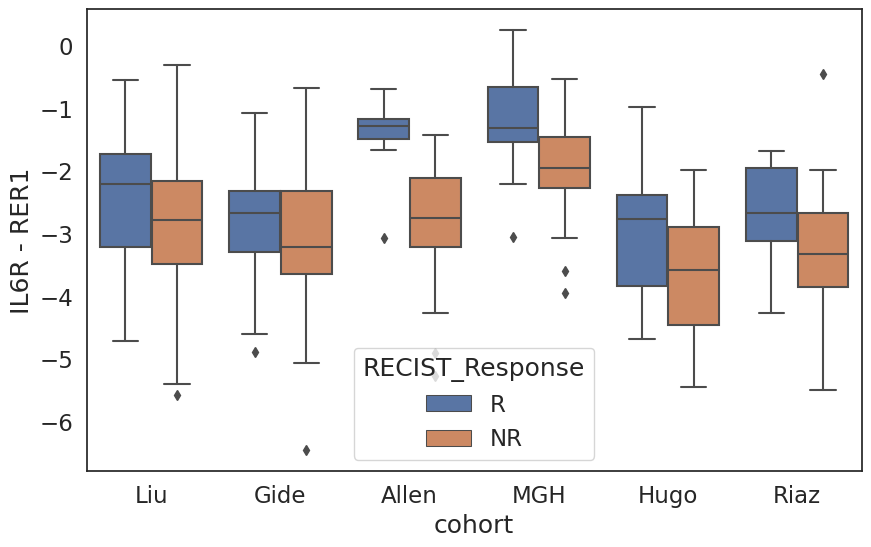

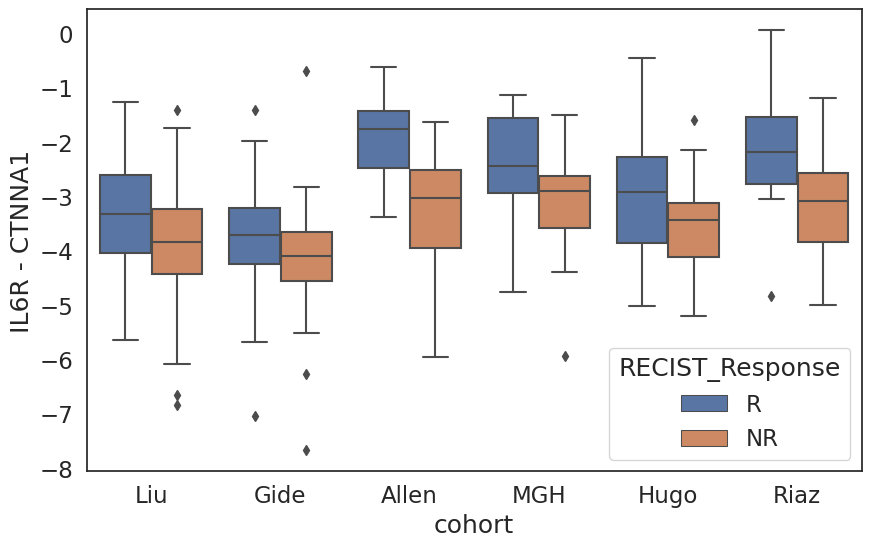

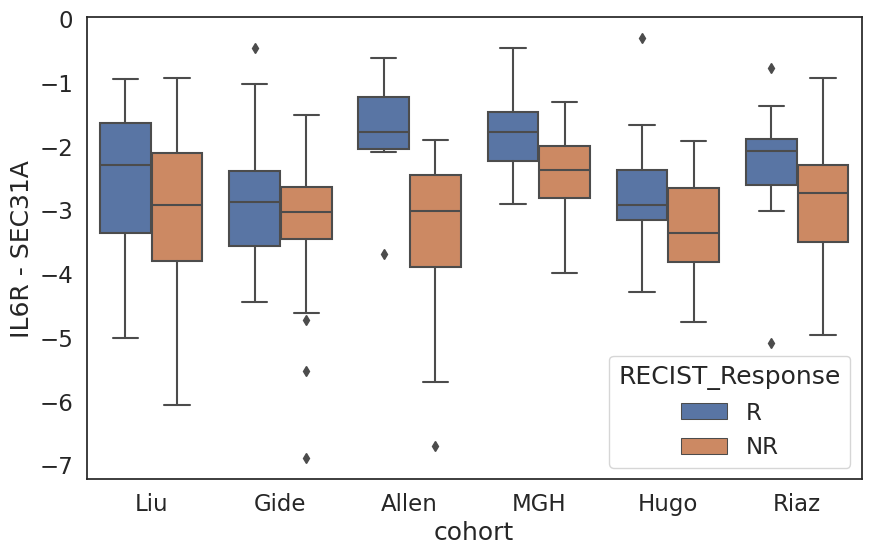

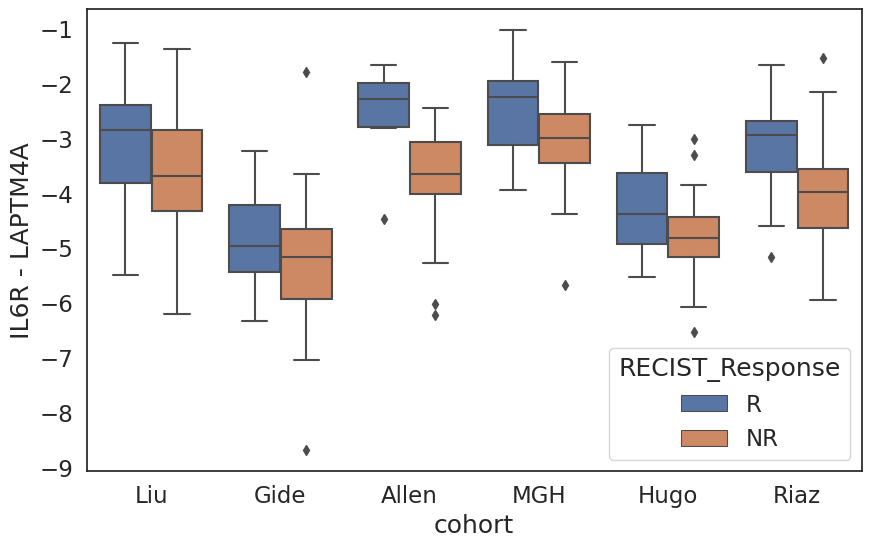

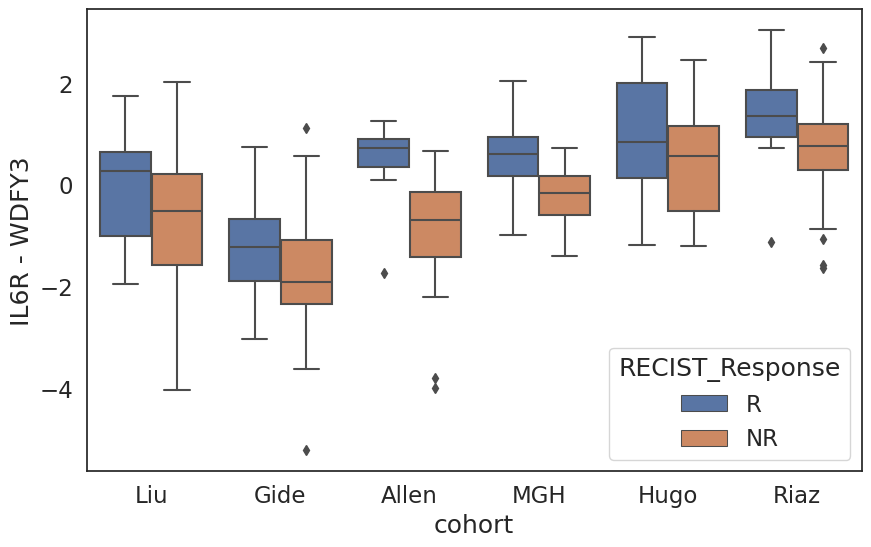

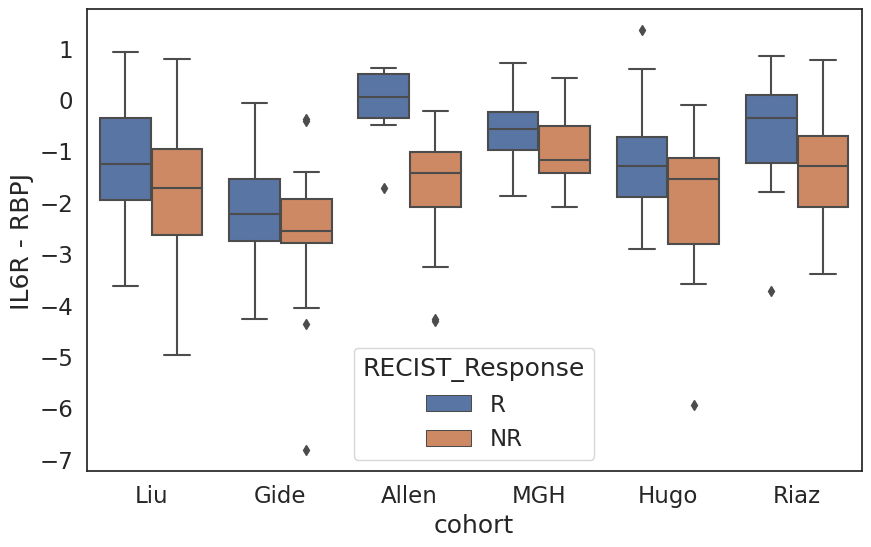

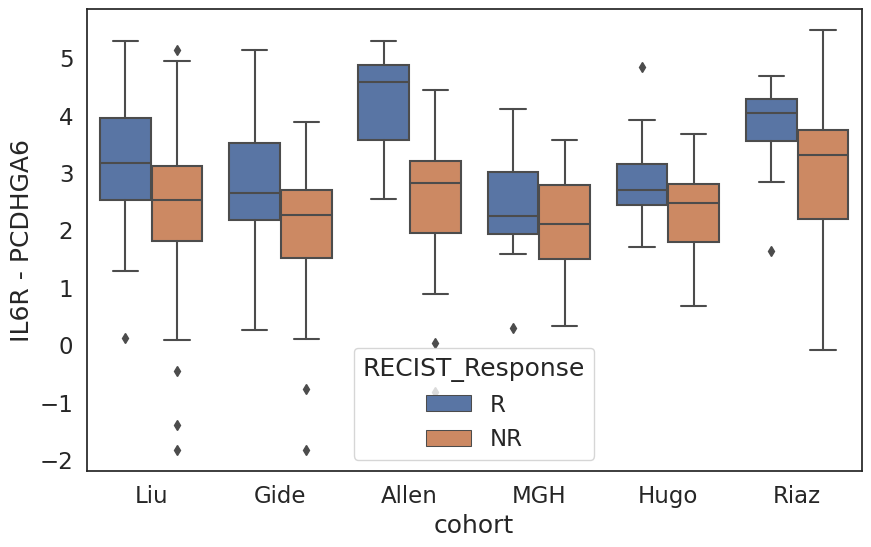

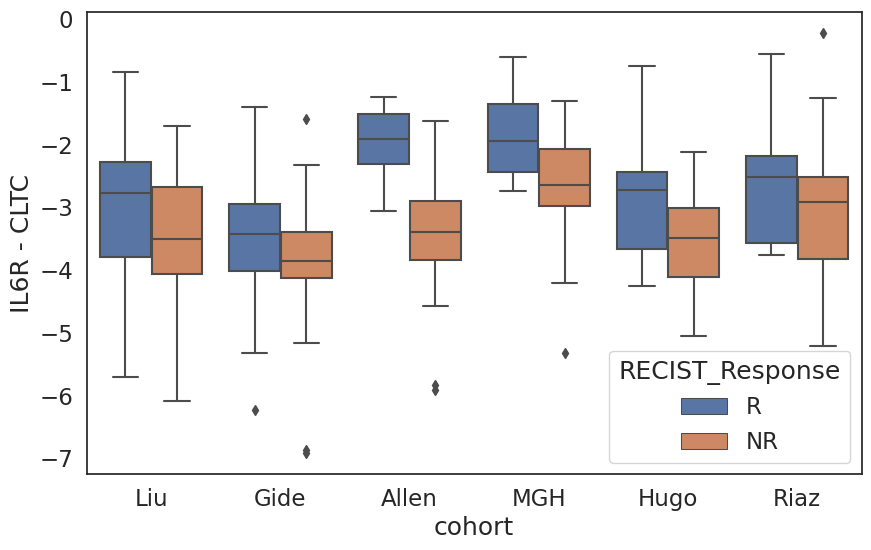

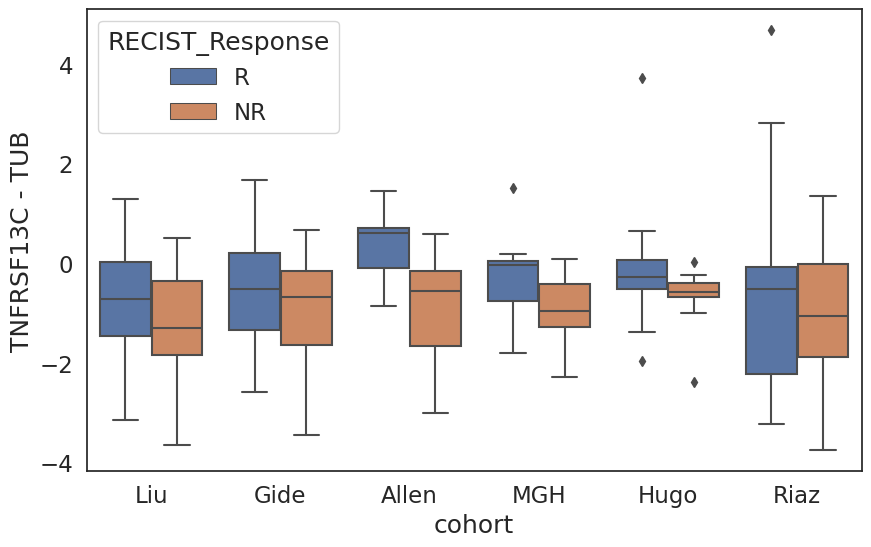

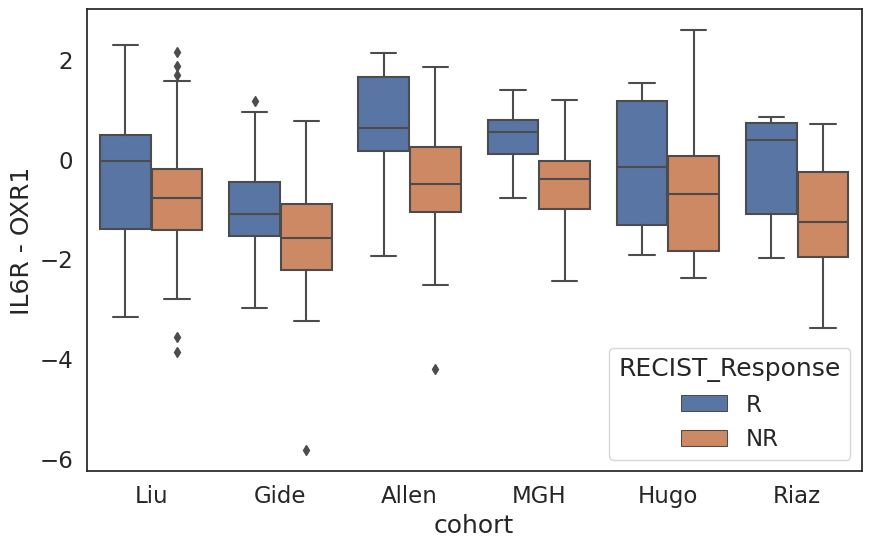

In [10]:
y_col = 'RECIST_Response'
for mk in df1.index[:10]:
    marker = mk.split(' - ')
    cohort_label = itrp_patient[['cohort', y_col]]
    pc = pairwise_combination(combination_pairs = [marker])
    marker_feature = pc.fit(itrp_tpm).transform()
    
    fname = marker_feature.columns[0]
    dfpp = marker_feature.join(cohort_label)
    dfpp = dfpp.dropna()
    fig,ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col, ax=ax)
    roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
    prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
    roc.join(prc)

In [11]:
roc.join(prc)

,,roc,prc
cohort,gene_name,,
Allen,IL6R - OXR1,0.732719,0.524090
Gide,IL6R - OXR1,0.625758,0.648732
Hugo,IL6R - OXR1,0.630952,0.609723
Liu,IL6R - OXR1,0.639083,0.511902
MGH,IL6R - OXR1,0.818452,0.687873
Riaz,IL6R - OXR1,0.764103,0.622025


100%|##########| 1/1 [00:00<00:00, 1089.15it/s]


,,roc,prc
cohort,gene_name,,
Allen,IL6R - CTNNA1,0.838710,0.705000
Gide,IL6R - CTNNA1,0.635606,0.648622
Hugo,IL6R - CTNNA1,0.654762,0.691618
Liu,IL6R - CTNNA1,0.654235,0.531346
MGH,IL6R - CTNNA1,0.693452,0.658030
Riaz,IL6R - CTNNA1,0.746154,0.506289


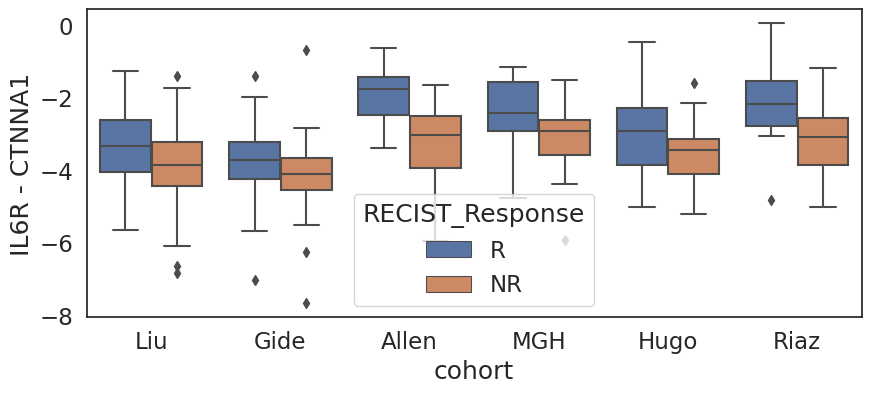

In [16]:
marker = ('IL6R', 'CTNNA1') #MAP4K1 - AGER  IL6R:CTNNA1

y_col = 'RECIST_Response'
cohort_label = itrp_patient[['cohort', y_col]]
pc = pairwise_combination(combination_pairs = [marker])
marker_feature = pc.fit(itrp_tpm).transform()

fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col, ax=ax)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1170.29it/s]


,,roc,prc
cohort,gene_name,,
Allen,tmb.wang,0.626728,0.333676
Hugo,tmb.wang,0.612179,0.639102
Liu,tmb.wang,0.575952,0.463021
MGH,tmb.wang,0.657143,0.382703
Riaz,tmb.wang,0.577941,0.243455


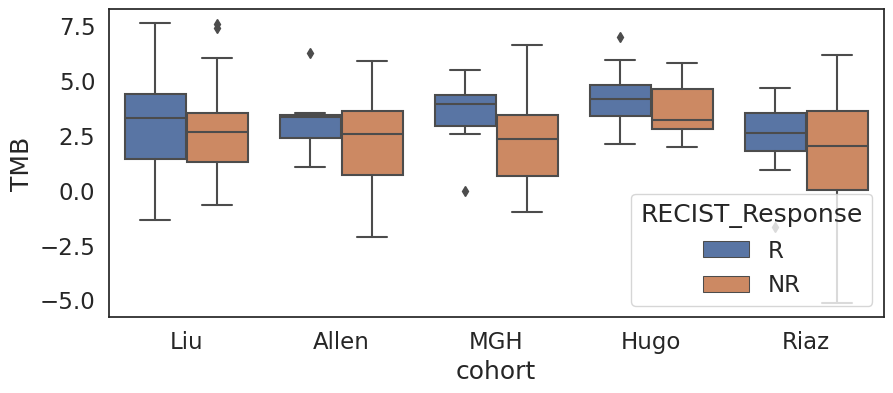

In [15]:
marker_feature = itrp_patient[['tmb.wang']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col, ax=ax)
ax.set_ylabel('TMB')
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1203.19it/s]


,,roc,prc
cohort,gene_name,,
Allen,tmb.wang,0.686391,0.511187
Hugo,tmb.wang,0.612179,0.639102
Liu,tmb.wang,0.570399,0.466306
MGH,tmb.wang,0.657143,0.382703
Riaz,tmb.wang,0.559722,0.225714


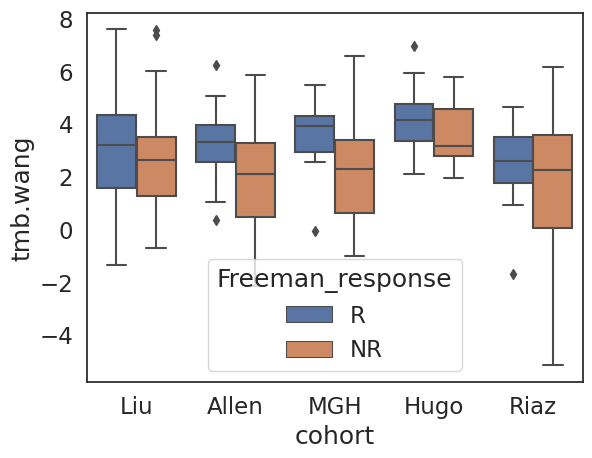

In [39]:
y_col = 'Freeman_response'
marker_feature = itrp_patient[['tmb.wang']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()

sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1364.00it/s]


,,roc,prc
cohort,gene_name,,
Allen,PDCD1,0.569124,0.189959
Gide,PDCD1,0.764773,0.791750
Hugo,PDCD1,0.523810,0.508611
Liu,PDCD1,0.512044,0.421474
MGH,PDCD1,0.482143,0.452914
Riaz,PDCD1,0.647436,0.403527


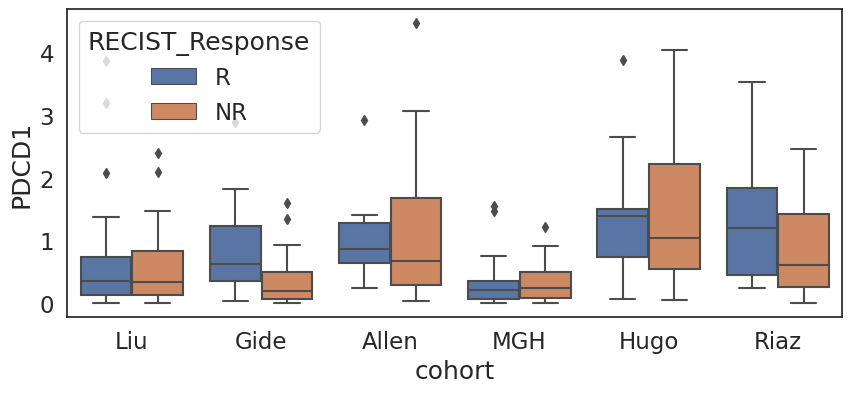

In [17]:
marker_feature = itrp_tpm[['PDCD1']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col, ax=ax)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 868.39it/s]


,,roc,prc
cohort,gene_name,,
Allen,CTLA4 - TNFSF4,0.692308,0.454082
Gide,CTLA4 - TNFSF4,0.704509,0.797291
Hugo,CTLA4 - TNFSF4,0.511905,0.513605
Liu,CTLA4 - TNFSF4,0.561715,0.519186
MGH,CTLA4 - TNFSF4,0.455357,0.353994
Riaz,CTLA4 - TNFSF4,0.578049,0.275657


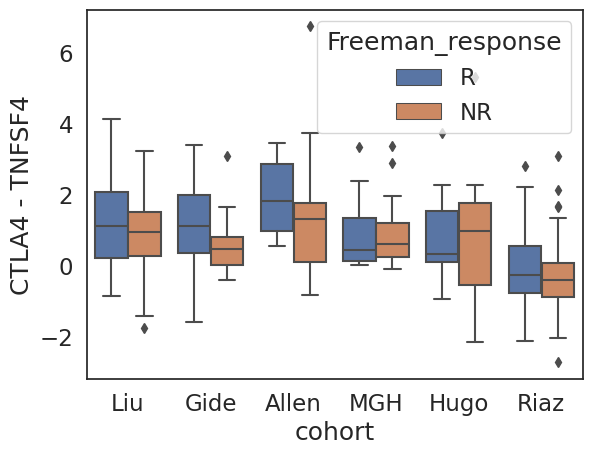

In [44]:
marker = ('CTLA4', 'TNFSF4') #MAP4K1 - AGER
y_col = 'Freeman_response'
cohort_label = itrp_patient[['cohort', y_col]]
pc = pairwise_combination(combination_pairs = [marker])
marker_feature = pc.fit(itrp_tpm).transform()

fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 865.52it/s]


,,roc,prc
cohort,gene_name,,
Allen,CD274,0.442396,0.163586
Gide,CD274,0.782955,0.847584
Hugo,CD274,0.595238,0.575677
Liu,CD274,0.545843,0.400452
MGH,CD274,0.507440,0.415448
Riaz,CD274,0.512821,0.218691


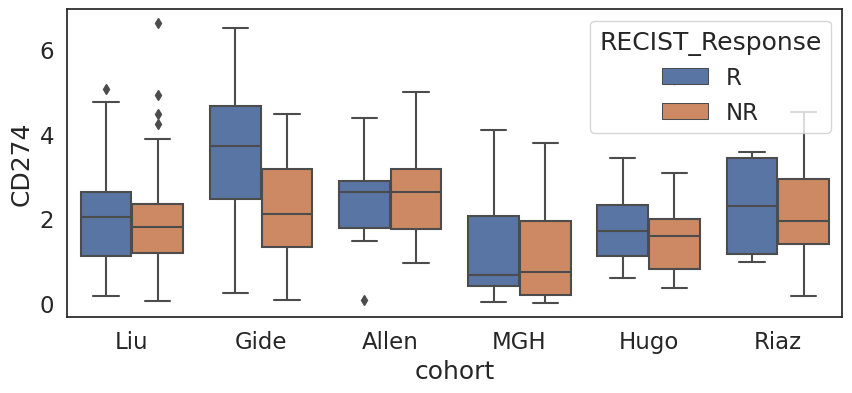

In [18]:
marker_feature = itrp_tpm[['CD274']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col, ax=ax)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)